In [1]:
#%matplotlib

# Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![](matplotlib_ex1.png)

In [2]:
'''
Exercise 1 skipped just plotting,
and went straight to figuring out looping
while plotting.

For x = np.linspace(0, 5, 200), 
I'd like to understand the role 
the third argument of linspace has on plotting.
It was trial and error with me using:
10, 50, 100. While talking with the study group,
the best number seemed to be 200 (from Sakif).
But I don't know why.

I didn't find an answer while rewatching
the Viz lecture or by googling.

'''

"\nExercise 1 skipped just plotting,\nand went straight to figuring out looping\nwhile plotting.\n\nFor x = np.linspace(0, 5, 200), \nit would be nice to understand the role \nthe third argument of linspace has on plotting.\nIt was trial and error with me using:\n10, 50, 100. While talking with the study group,\nthe best number seemed to be 200 (from Sakif).\nBut I don't know why.\n\nI didn't find an answer while rewatching\nthe Viz lecture or by googling.\n\n"

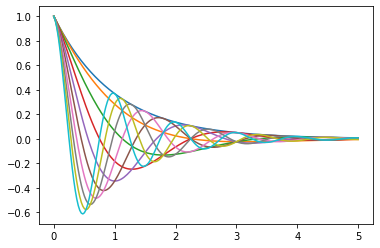

In [3]:
# Exercise 1


import matplotlib.pyplot as plt
import numpy as np

fig,axes = plt.subplots()

# x over interval from 0 to 5, with 200 spaced points. Why?
x = np.linspace(0, 5, 200)

# loop in np.linspace(0, 2, 10)
for e in np.linspace(0, 2, 10):
    #𝑓(𝑥)=cos(𝜋𝜃𝑥)exp(−𝑥)
    y = np.cos(np.pi*e*x) * np.exp(-x)
    axes.plot(x,y)
    
plt.show();

# Exercise 2

Reproduce the plot below:

![](federer.png)

Given the `data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match

In [4]:
'''
I spent 1 1/2 days trying to make a scatter plot.
Very frustrating.

I don't understand why this looks the way it does.

'''

"\nI spent 1 1/2 days trying to make a scatter plot.\nVery frustrating.\n\nI don't understand why this looks the way it does.\n\n"

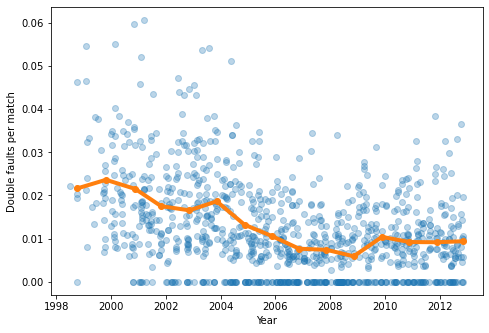

In [5]:
# Exercise # 2

import pandas as pd
import matplotlib.pyplot as plt


# load and prepare data
tennis = pd.read_csv('data/tennis.csv',
                       parse_dates=['start date','year'])

tennis['ratio'] = tennis['player1 double faults'] / tennis['player1 total points total']

year_groupby1 = tennis.groupby('year')['start date'].max()

year_groupby2 = tennis.groupby('year')['ratio'].mean()


# figure
fig, axes = plt.subplots()
axes = fig.add_axes([0,0,1,1])

# blue bubbles
axes.plot_date(tennis['start date'],
               tennis['ratio'],
               alpha = 0.3)

# yellow line
axes.plot_date(year_groupby1,
               year_groupby2,
               linestyle='-',
               linewidth=4)


axes.set(xlabel='Year',
         ylabel='Double faults per match')


plt.show();
#axes.plot();

# Exercise 3

With these imports:

```python
import datetime as dt
from pandas_datareader import data
```

If needed, install the datareader with

```
!pip install --upgrade pandas-datareader
```

Write a program to calculate the percentage price change over 2019 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
```               

Here’s the first part of the program:

```python
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

Complete the program to plot the result as a bar graph like this one for each:

![](pandas_share_prices.png)


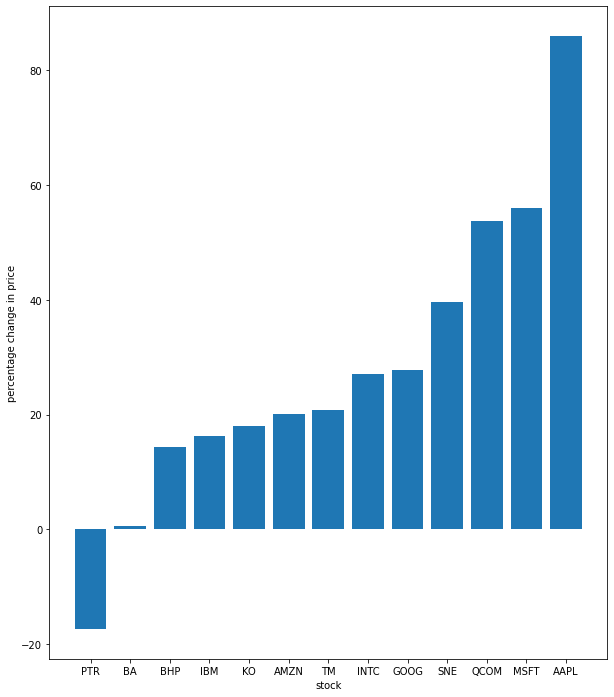

In [6]:
# Exercise 3

import datetime as dt
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt


ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}


def read_data(ticker_list,
              start=dt.datetime(2019, 1, 2),
              end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
df = pd.DataFrame(ticker)

first = df.iloc[0]
last = df.iloc[-1]
percentage = (last - first)/first * 100
percentage = percentage.sort_values()

plt.figure(figsize=(10,12))
plt.bar(percentage.keys(), percentage, align='center')


plt.xlabel('stock')
plt.ylabel('percentage change in price')

plt.show();


# Exercise 4

Using the method `read_data` introduced in Exercise 1, write a program to obtain year-on-year percentage change for the following indices:

```
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![](pandas_indices_pctchange.png)

In [7]:
'''
In exercise 3, the start and end dates were
the same for the entire figure. 

For exercise 4, the output plots have 3 different start years:
before 1940, 1970 and 1985.

I could not figure out a way to make the function work for the entire
figure with different start dates. 

Below, my answer for exercise #4 basically shows a figure with 4 empty plots.

'''

'\nIn exercise 3 (not exercise 1), the start and end dates were\nthe same for the entire figure. \n\nFor exercise 4, the output plots have 3 different start years:\nbefore 1940, 1970 and 1985.\n\nI could not figure out a way to make the function work for the entire\nfigure with different start dates. \n\nBelow, my answer for exercise #4 basically shows a figure with 4 empty plots.\n\n'

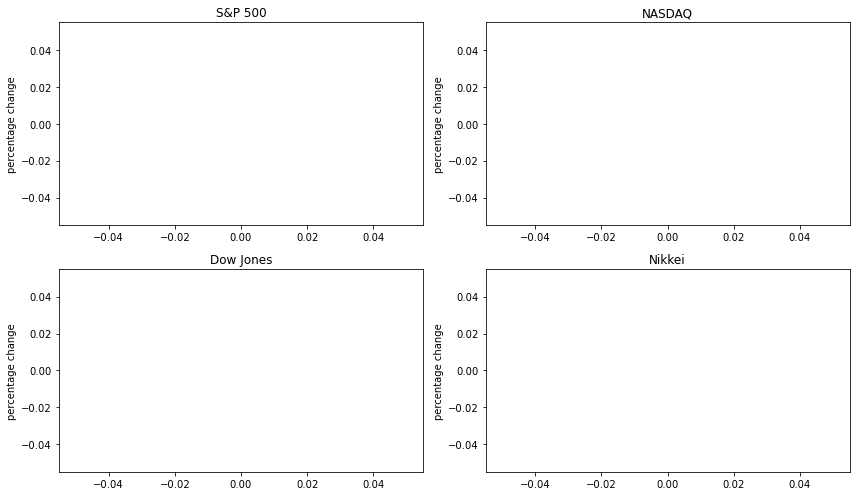

In [8]:
# Exercise 4

import datetime as dt
import matplotlib.pyplot as plt

indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

def read_data(indices_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the indices_list.
    """
    indices = pd.DataFrame()

    # verify and update as needed          
    for indice in indices_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker    

nrows, ncols = (2,2)
fig,axes = plt.subplots(nrows,ncols, figsize=(12,7))


axes[0][0].plot()

axes[0][1].plot()

axes[1][0].plot()

axes[1][1].plot()


plt.ylabel('percentage change')

# Manually or better way? Rearrange by axes?
axes[0][0].set_title('S&P 500')
axes[0][1].set_title('NASDAQ')
axes[1][0].set_title('Dow Jones')
axes[1][1].set_title('Nikkei')

# Manually or better way? Rearrange by axes?             
axes[0][0].set_ylabel('percentage change')
axes[0][1].set_ylabel('percentage change')
axes[1][0].set_ylabel('percentage change')
axes[1][1].set_ylabel('percentage change')


#plt.show()
plt.tight_layout()
#for my info
#type(axes) #np.array
#axes.shape

# Exercise 5: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

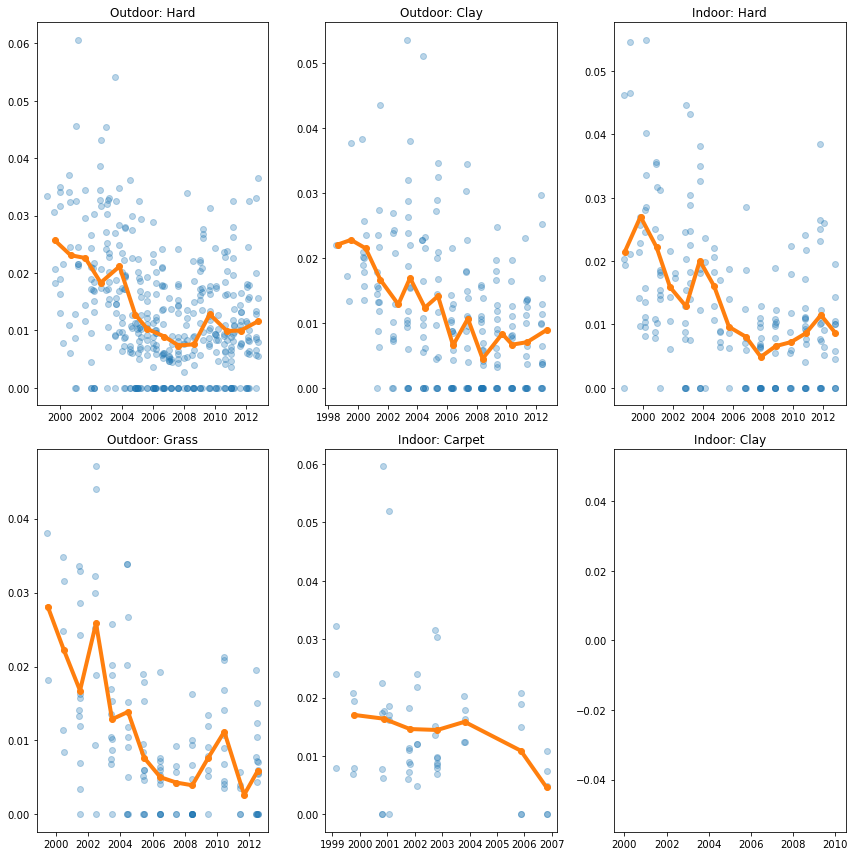

In [9]:
# Exercise 5

import pandas as pd
import matplotlib.pyplot as plt


# load and prepare data
tennis = pd.read_csv('data/tennis.csv',
                       parse_dates=['start date','year'])


tennis['ratio'] = tennis['player1 double faults'] / tennis['player1 total points total']

# for my info tennis.surface
tennis.surface.value_counts()
                                    
# tables names
table_1 = tennis[tennis['surface'] == 'Outdoor: Hard']
table_2 = tennis[tennis['surface'] == 'Outdoor: Clay']
table_3 = tennis[tennis['surface'] == 'Indoor: Hard']
table_4 = tennis[tennis['surface'] == 'Outdoor: Grass']
table_5 = tennis[tennis['surface'] == 'Indoor: Carpet']
table_6 = tennis[tennis['surface'] == 'Indoor: Clay']

# table positions will be defined by axes[r][c]                                 
nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(12,12))


# table_1 at axes[0][0]
axes[0][0].plot_date(table_1['start date'],
                     table_1['ratio'],
                     alpha = 0.3)

year_groupby1 = table_1.groupby('year')['start date'].max()
year_groupby2 = table_1.groupby('year')['ratio'].mean()                                    
axes[0][0].plot_date(year_groupby1,
               year_groupby2,
               linestyle = '-',
               linewidth = 4)
axes[0][0].set(title = 'Outdoor: Hard')


# table_2 at axes[0][1]
axes[0][1].plot_date(table_2['start date'],
                     table_2['ratio'],
                     alpha = 0.3)

year_groupby1 = table_2.groupby('year')['start date'].max()
year_groupby2 = table_2.groupby('year')['ratio'].mean()                                    
axes[0][1].plot_date(year_groupby1,
               year_groupby2,
               linestyle = '-',
               linewidth = 4)
axes[0][1].set(title = 'Outdoor: Clay')



# table_3 at axes[0][2]
axes[0][2].plot_date(table_3['start date'],
                     table_3['ratio'],
                     alpha = 0.3)

year_groupby1 = table_3.groupby('year')['start date'].max()
year_groupby2 = table_3.groupby('year')['ratio'].mean()                                    
axes[0][2].plot_date(year_groupby1,
               year_groupby2,
               linestyle = '-',
               linewidth = 4)
axes[0][2].set(title = 'Indoor: Hard')
                                   
                                    
# table_4 at axes[1][0]
axes[1][0].plot_date(table_4['start date'],
                     table_4['ratio'],
                     alpha = 0.3)

year_groupby1 = table_4.groupby('year')['start date'].max()
year_groupby2 = table_4.groupby('year')['ratio'].mean()                                    
axes[1][0].plot_date(year_groupby1,
               year_groupby2,
               linestyle = '-',
               linewidth = 4)
axes[1][0].set(title = 'Outdoor: Grass')

                                    
# table_5 at axes[1][1]
axes[1][1].plot_date(table_5['start date'],
                     table_5['ratio'],
                     alpha = 0.3)

year_groupby1 = table_5.groupby('year')['start date'].max()
year_groupby2 = table_5.groupby('year')['ratio'].mean()                                    
axes[1][1].plot_date(year_groupby1,
               year_groupby2,
               linestyle = '-',
               linewidth = 4)
axes[1][1].set(title = 'Indoor: Carpet')                                 
                                    

# table_6 at axes[1][2]
axes[1][2].plot_date(table_6['start date'],
                     table_6['ratio'],
                     alpha = 0.3)

year_groupby1 = table_6.groupby('year')['start date'].max()
year_groupby2 = table_6.groupby('year')['ratio'].mean()                                    
axes[1][1].plot_date(year_groupby1,
               year_groupby2,
               linestyle = '-',
               linewidth = 4)
axes[1][2].set(title = 'Indoor: Clay')      
                                    
                                    
                                    
                                    
plt.tight_layout()                                                             